In [1]:
%matplotlib inline
from P2 import *
from pyspark import SparkContext
import random
import numpy

In [2]:
sc = SparkContext("local", "P2")

In [3]:
rdd = sc.parallelize(xrange(0, 2000), 10)
cross = rdd.cartesian(rdd)
map_mandelbrot = cross.map(lambda x: (x,mandelbrot(x[0]/500.0 - 2, x[1]/500.0 - 2)))
sum_partitions = sum_values_for_partitions(map_mandelbrot)

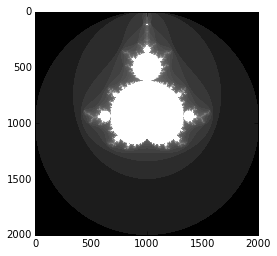

In [4]:
draw_image(map_mandelbrot)

In [5]:
sum_array = sum_partitions.collect()

5152754.37964


(array([ 86.,   0.,   2.,   2.,   0.,   1.,   1.,   2.,   2.,   4.]),
 array([        0.,   2044000.,   4088000.,   6132000.,   8176000.,
         10220000.,  12264000.,  14308000.,  16352000.,  18396000.,
         20440000.]),
 <a list of 10 Patch objects>)

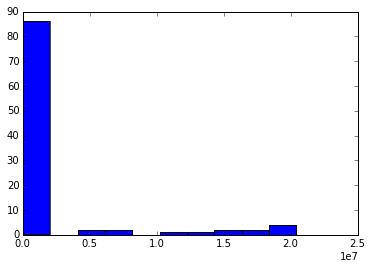

In [6]:
print numpy.std(sum_array)
plt.hist(sum_array)

In [58]:
def partitionNode(node):
    x,y = node
    min_x = 800
    max_x = 1000
    min_y = 700
    max_y = 1200
    if x >= min_x and x < max_x and y >= min_y and y < max_y:
        return (y-min_y)/5
    else:
        return random.randint(0, 99)

In [40]:
max_mandel = map_mandelbrot.filter(lambda x: x[1] > 450).map(lambda x: x[0])
tuples = max_mandel.collect()

In [55]:
buckets = [0]*21
for x,y in tuples:
    buckets[y/100] += 1
buckets

[0,
 0,
 0,
 0,
 30,
 1595,
 11093,
 41412,
 56561,
 78255,
 78673,
 56795,
 41609,
 11278,
 1684,
 31,
 0,
 0,
 0,
 0,
 0]

24852.3251531


(array([  3.,   4.,   4.,  16.,  19.,  22.,  14.,   8.,   6.,   4.]),
 array([ 1965680. ,  1977826.4,  1989972.8,  2002119.2,  2014265.6,
         2026412. ,  2038558.4,  2050704.8,  2062851.2,  2074997.6,
         2087144. ]),
 <a list of 10 Patch objects>)

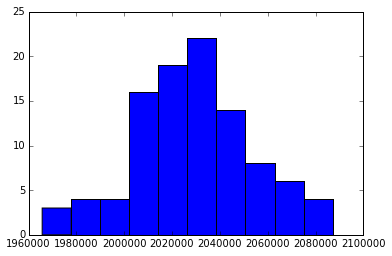

In [59]:
partitioned_mandelbrot = cross.map(lambda x: (x,0)).partitionBy(100, partitionNode)
partitioned_mandelbrot = partitioned_mandelbrot.map(lambda x: (x[0],mandelbrot(x[0][0]/500.0 - 2, x[0][1]/500.0 - 2)))
partition_sums = sum_values_for_partitions(partitioned_mandelbrot).collect()
print numpy.std(partition_sums)
plt.hist(partition_sums)

31141.589793


(array([  3.,  12.,  12.,  16.,  14.,  14.,  16.,  10.,   1.,   2.]),
 array([ 1963384. ,  1977739.8,  1992095.6,  2006451.4,  2020807.2,
         2035163. ,  2049518.8,  2063874.6,  2078230.4,  2092586.2,
         2106942. ]),
 <a list of 10 Patch objects>)

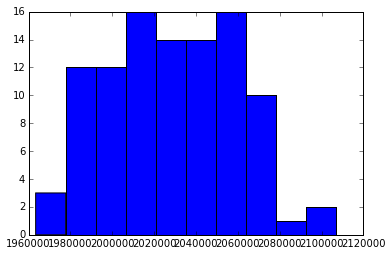

In [8]:
partitioned_mandelbrot = cross.partitionBy(100, lambda x: random.randint(0,99))
partitioned_mandelbrot = partitioned_mandelbrot.map(lambda x: (x,mandelbrot(x[0]/500.0 - 2, x[1]/500.0 - 2)))
partition_sums = sum_values_for_partitions(partitioned_mandelbrot).collect()
print numpy.std(partition_sums)
plt.hist(partition_sums)

In [10]:
partitioned_mandelbrot.getNumPartitions()

100

78831.752249


(array([ 18.,  15.,  13.,  11.,   2.,   3.,   4.,   8.,   8.,  18.]),
 array([ 1922869. ,  1946136.7,  1969404.4,  1992672.1,  2015939.8,
         2039207.5,  2062475.2,  2085742.9,  2109010.6,  2132278.3,
         2155546. ]),
 <a list of 10 Patch objects>)

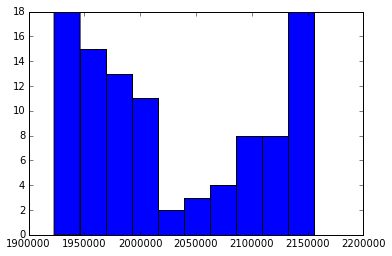

In [41]:
partitioned_mandelbrot = cross.partitionBy(100)
partitioned_mandelbrot = partitioned_mandelbrot.map(lambda x: (x,mandelbrot(x[0]/500.0 - 2, x[1]/500.0 - 2)))
partition_sums = sum_values_for_partitions(partitioned_mandelbrot).collect()
print numpy.std(partition_sums)
plt.hist(partition_sums)

In [35]:
sorted(map_mandelbrot.glom().collect()[0], key = lambda x: x[0])

[((0, 0), 0),
 ((0, 1), 0),
 ((0, 2), 0),
 ((0, 3), 0),
 ((0, 4), 0),
 ((0, 5), 0),
 ((0, 6), 0),
 ((0, 7), 0),
 ((0, 8), 0),
 ((0, 9), 0),
 ((0, 10), 0),
 ((0, 11), 0),
 ((0, 12), 0),
 ((0, 13), 0),
 ((0, 14), 0),
 ((0, 15), 0),
 ((0, 16), 0),
 ((0, 17), 0),
 ((0, 18), 0),
 ((0, 19), 0),
 ((0, 20), 0),
 ((0, 21), 0),
 ((0, 22), 0),
 ((0, 23), 0),
 ((0, 24), 0),
 ((0, 25), 0),
 ((0, 26), 0),
 ((0, 27), 0),
 ((0, 28), 0),
 ((0, 29), 0),
 ((0, 30), 0),
 ((0, 31), 0),
 ((0, 32), 0),
 ((0, 33), 0),
 ((0, 34), 0),
 ((0, 35), 0),
 ((0, 36), 0),
 ((0, 37), 0),
 ((0, 38), 0),
 ((0, 39), 0),
 ((0, 40), 0),
 ((0, 41), 0),
 ((0, 42), 0),
 ((0, 43), 0),
 ((0, 44), 0),
 ((0, 45), 0),
 ((0, 46), 0),
 ((0, 47), 0),
 ((0, 48), 0),
 ((0, 49), 0),
 ((0, 50), 0),
 ((0, 51), 0),
 ((0, 52), 0),
 ((0, 53), 0),
 ((0, 54), 0),
 ((0, 55), 0),
 ((0, 56), 0),
 ((0, 57), 0),
 ((0, 58), 0),
 ((0, 59), 0),
 ((0, 60), 0),
 ((0, 61), 0),
 ((0, 62), 0),
 ((0, 63), 0),
 ((0, 64), 0),
 ((0, 65), 0),
 ((0, 66), 0),
 ((0,